# 1.Regression linéaire

In [214]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

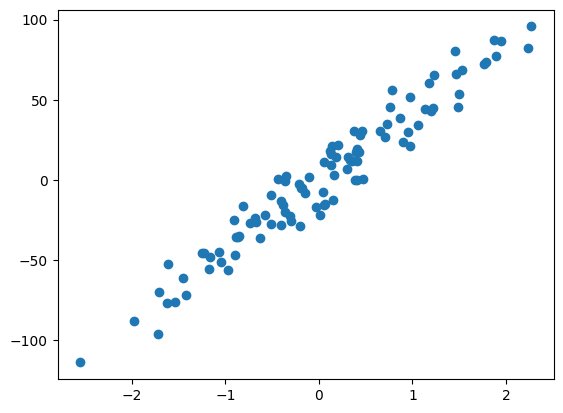

In [215]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [216]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [217]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [218]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

## 1.1 Modele Linéaire
On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

In [219]:
def model(X, theta):
    return X.dot(theta)

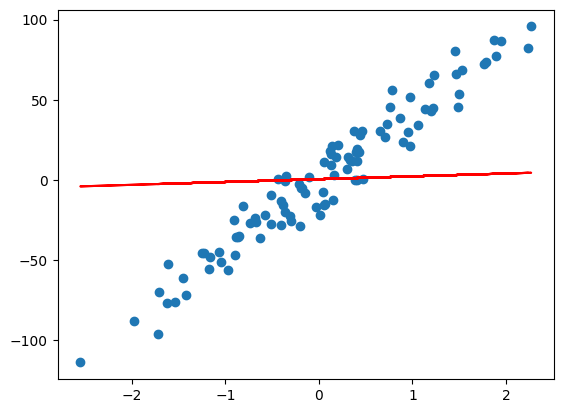

In [220]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## 1.2 Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [221]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [222]:
cost_function(X, y, theta)

np.float64(905.6306841935502)

## 1.3 Gradients et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [223]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [224]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 1.4 Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [225]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [226]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[42.61765864],
       [-0.81309274]])

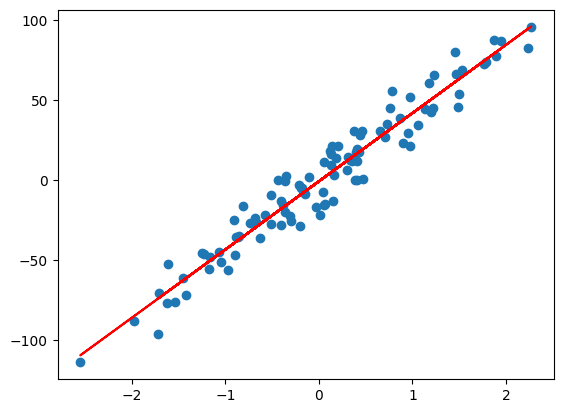

In [227]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# 1.5 Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

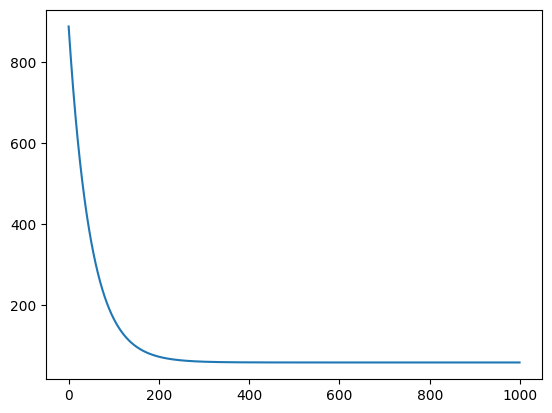

In [228]:
plt.plot(range(n_iterations), cost_history)

# 1.6 Evaluation finale
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

In [229]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [230]:
coef_determination(y, predictions)

np.float64(0.9417294706504984)

# 2. Methode des moindres carrés

En utilisant cette méthode nous l'expression suivante de $\theta$ :<br />
$\theta = (X^TX)^{-1}(X^Ty)$

In [231]:
# fonction pour trouver la valeur de theta.
def least_square(X, y):
    return np.linalg.inv(X.T@X)@(X.T@y)

In [232]:
theta_final = least_square(X, y)
theta_final

array([[42.61943029],
       [-0.81418183]])

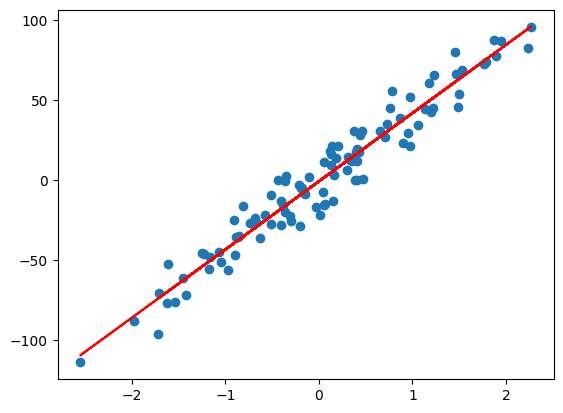

In [233]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# 3. Regression polynomiale

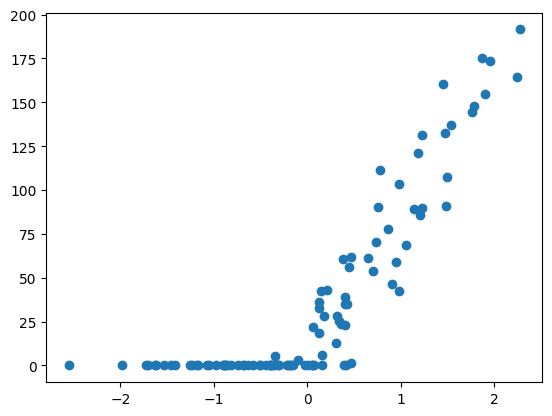

In [234]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + np.abs(y)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [235]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


Création de la matrice X qui contient la colonne de $x^2$, $x$ et de Biais. Pour ca, on colle l'un contre l'autre le vecteur $x^2$, vecteur $x^2$ et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [236]:
X = np.hstack((x**2, x, np.ones(x.shape)))
print(X.shape)

(100, 3)


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (3, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [237]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(3, 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

## 3.1 Modele Linéaire

On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

In [238]:
def model(X, theta):
    return X.dot(theta)

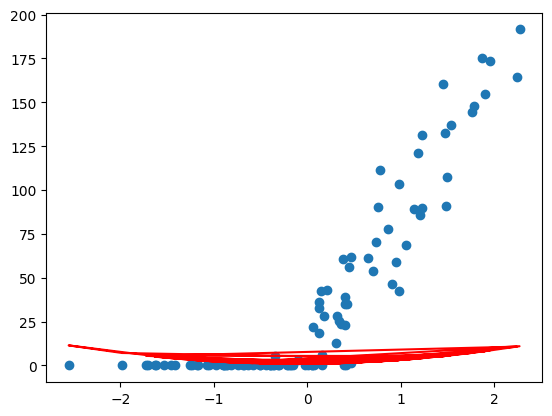

In [239]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

## 3.2 Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [240]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [241]:
cost_function(X, y, theta)

np.float64(1895.5140795964699)

## 3.3 Gradients et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


In [242]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [243]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 3.4 Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [244]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [245]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[17.8540732 ],
       [41.76322643],
       [16.52191697]])

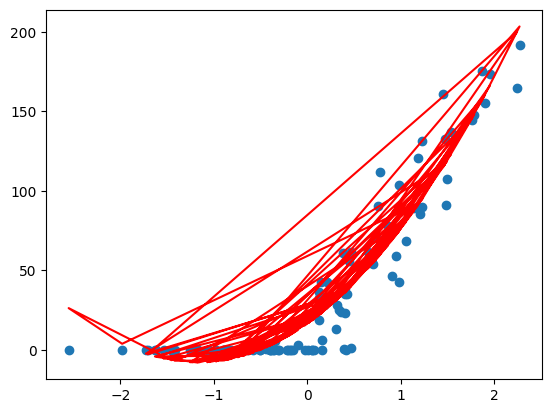

In [246]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

## 3.5 Courbes d'apprentissage

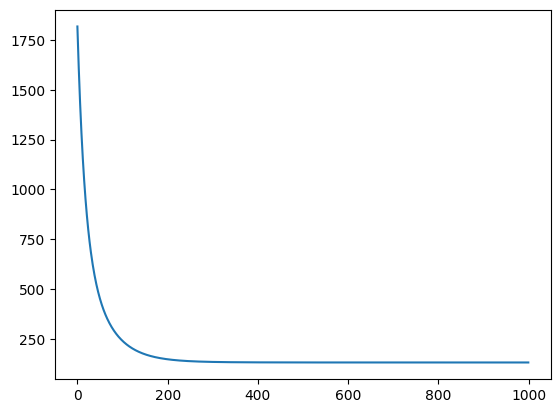

In [247]:
plt.plot(range(n_iterations), cost_history)

## 3.6 Evaluation finale

In [248]:
coef_determination(y, predictions)

np.float64(0.905190629144932)

# 4. Regression linéaire avec 2 features

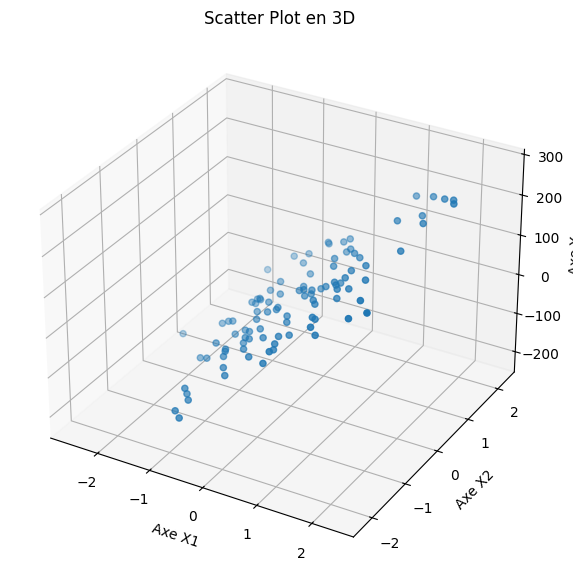

In [249]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=2, noise=10)

# Créer une figure  
fig = plt.figure(figsize=(9, 7))  
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,1], x[:,0], y) # afficher les résultats. X1 et X2 en abscisse et y en ordonnée

# Ajouter des étiquettes aux axes  
ax.set_xlabel('Axe X1')  
ax.set_ylabel('Axe X2')  
ax.set_zlabel('Axe Y')  
ax.set_title('Scatter Plot en 3D')

plt.show()

Important: vérifier les dimensions de x et y. On remarque que y n'a pas les dimensions (100, 1). On corrige le probleme avec np.reshape

In [250]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 2)
(100,)
(100, 1)


Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [251]:
X = np.insert(x, 2, 1, axis=1)
print(X.shape)

(100, 3)


Finalement, création d'un vecteur parametre $\theta$, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (3, 1). Si on désire toujours reproduire le meme vecteur $\theta$, on utilise comme avant np.random.seed(0).

In [252]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(3, 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

## 4.1 Modele Linéaire
On implémente un modele $F = X.\theta$, puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de $\theta$

**NB :** nous utilisons la model definit précédemment car seule l'expression de x a changé

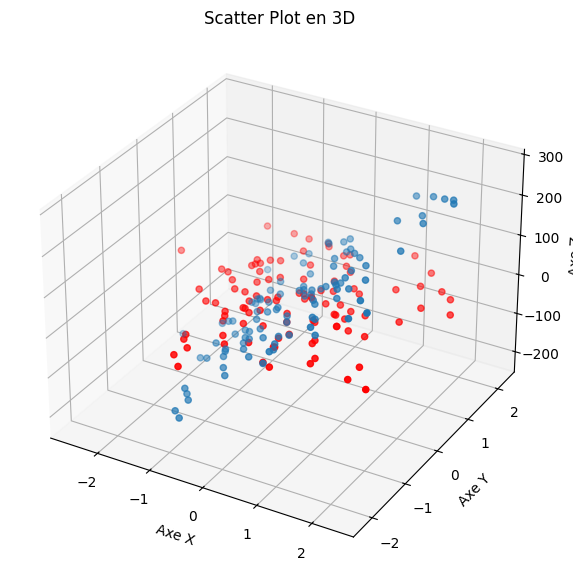

In [253]:
# Créer une figure  
fig = plt.figure(figsize=(9, 7))  
ax = fig.add_subplot(111, projection='3d')

# Tracer le plan  
ax.scatter(x[:,1], x[:,0], model(X, theta)[:,0], c='r')

ax.scatter(x[:,1], x[:,0], y[:,0]) # afficher les résultats. X en abscisse et y en ordonnée

# Ajouter des étiquettes aux axes  
ax.set_xlabel('Axe X')  
ax.set_ylabel('Axe Y')  
ax.set_zlabel('Axe Z')  
ax.set_title('Scatter Plot en 3D')

plt.show()

## 4.2 Fonction Cout :  Erreur Quadratique moyenne

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [254]:
cost_function(X, y, theta)

np.float64(5258.759445573964)

## 4.3 Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [255]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [256]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[28.67163058],
       [97.29525524],
       [-0.51154971]])

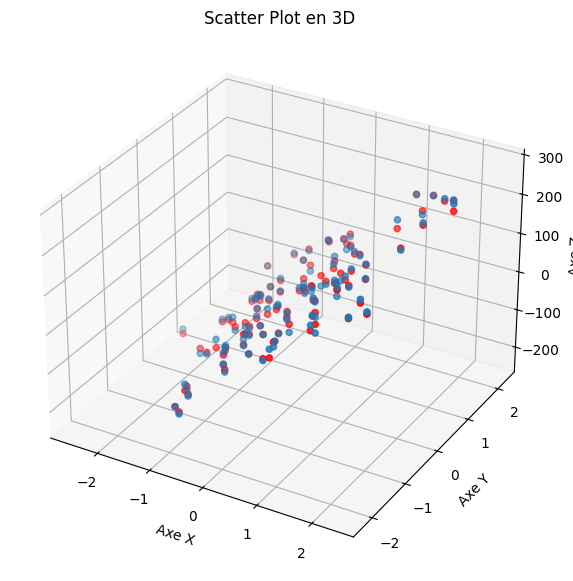

In [257]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Tracer le plan  

# Créer une figure  
fig = plt.figure(figsize=(9, 7))  
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,1], x[:,0], predictions[:,0], c='r')

ax.scatter(x[:,1], x[:,0] , y[:,0]) # afficher les résultats. X en abscisse et y en ordonnée

# Ajouter des étiquettes aux axes  
ax.set_xlabel('Axe X')  
ax.set_ylabel('Axe Y')  
ax.set_zlabel('Axe Z')  
ax.set_title('Scatter Plot en 3D')

plt.show()

## 4.4 Courbes d'apprentissage

Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

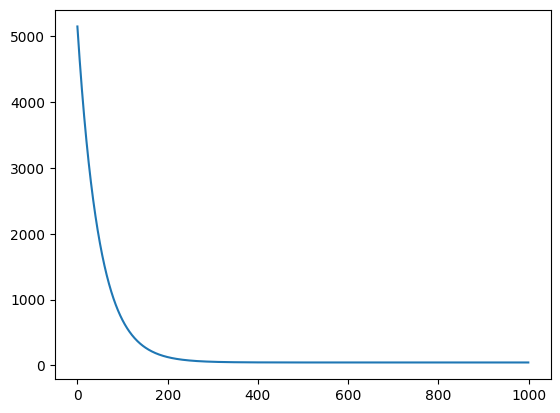

In [258]:
plt.plot(range(n_iterations), cost_history)

# 1.6 Evaluation finale
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

In [259]:
coef_determination(y, predictions)

np.float64(0.9916687122989147)